#  EagleEye_v7 tutorial


We import necessary libraries and set up custom plot configurations for consistency.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Directory setup for custom modules
import sys
module_path = '../../eagleeye'
sys.path.append(module_path)
import EagleEye_v17
from utils_EE_v17 import compute_the_null, partitioning_function

# Custom plotting settings
sns.set(style="darkgrid")
plt.rcParams.update({
    'axes.titlesize': 21,
    'axes.labelsize': 17,
    'xtick.labelsize': 17,
    'ytick.labelsize': 17,
    'legend.fontsize': 17,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.color': 'silver'
})


## 1. Generate the datasets 

In [2]:
from utils_37 import generate_uniform_with_Gaussian_ove_under

# Generate data with anomalies
num_points = 50000
anomaly_sizes_o = [50, 100, 200, 300, 500, 700, 900]
anomaly_sizes_u = [ 100, 300, 700, ]
n_dim = 3

#reference_data, test_data = generate_uniform_with_Gaussian_ove_under(n_dim, num_points, anomaly_sizes_o, anomaly_sizes_u)
X = np.load('reference_data.npy')
Y = np.load('test_data.npy')

In [3]:
#np.save('reference_data.npy',reference_data)
#np.save('test_data.npy',test_data)

### 1.1 Visualize the generated datasets 

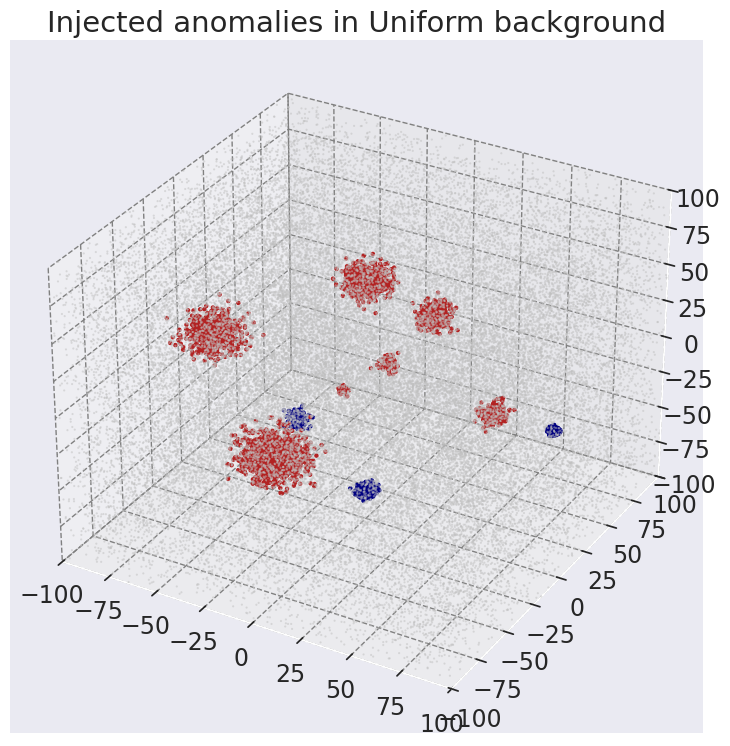

In [4]:
from utils_37 import plot_injected_anomalies_in_uniform_background

# plot of the generated dataset. In silver the background only
# in red the injected overdensities and in blue the injected underdensities
plot_injected_anomalies_in_uniform_background(X, anomaly_sizes_u, Y, anomaly_sizes_o)

## 2. EagleEye_v17

### 2.1 Flagging of putative anomalous points 

### 2.2 Pruning via iterative density equalization (IDE)

Reference dataset: $\mathbf{X}$

Test dataset:      $\mathbf{Y}$ 



In [5]:
K_M                   = 500
p                     = len(Y)/(len(Y)+len(X))
stats_null            = compute_the_null(p=0.5, K_M=K_M)

p_ext=1e-5
n_jobs=10

result_dict, stats_null = EagleEye_v17.Soar(X, Y, K_M=K_M, p_ext=p_ext, n_jobs=n_jobs, stats_null=stats_null, result_dict_in={})


Eagle...Soar!

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@%*+++*#%@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@*.               =@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@-                       %@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@#                            +@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@%@@@%                                -@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@%                                    #@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@:                                       @@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@                                          %@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@*                                            +@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@:                                              =@@@@@@@@@@@@@@
@@@@@@@@@@@@@%.                                  

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-----------------------------------------------------------------
Perform IDE of the Y set.
-----------------------------------------------------------------
Perform IDE of the X set.


Max Upsilon remained: 52.46988614163085
Max Upsilon remained: 51.19248552952728
Max Upsilon remained: 50.915709252742296
Max Upsilon remained: 50.4953020572742
Max Upsilon remained: 50.18453917075613
Max Upsilon remained: 50.13316203050977
Max Upsilon remained: 49.82427091921038
Max Upsilon remained: 49.67678304032685
Max Upsilon remained: 49.46205326899851
Max Upsilon remained: 49.31947495665601
Max Upsilon remained: 49.11395563695675
Max Upsilon remained: 48.765201646811455
Max Upsilon remained: 48.607242723173485
Max Upsilon remained: 48.607242723173485
Max Upsilon remained: 47.31807726612411
Max Upsilon remained: 46.91264377770183
Max Upsilon remained: 46.89118021272685
Max Upsilon remained: 46.08823117567385
Max Upsilon remained: 45.765015140687844
Max Upsilon remained: 45.07217727000874
Max Upsilon remained: 45.05225044676459
Max Upsilon remained: 44.351325776342584
Max Upsilon remained: 43.883951035611666
Max Upsilon remained: 43.83671730209651
Max Upsilon remained: 42.657107041

### 2.3 Repˆechage 

In [6]:
#%% # Clustering

clusters = partitioning_function(X,Y,result_dict,p_ext=1e-5,Z=2.65, reverse=True )
EE_book = EagleEye_v17.Repechage(X,Y,result_dict,clusters,p_ext=1e-5)


/u/s/sspringe/anaconda3/envs/EagleEye/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Computation of distances started
Computation of the distances up to 500 NNs started
0.30 seconds for computing distances
ID estimation finished: selecting ID of 2.9653409828345394
kstar estimation started, Dthr = 23.92812698
0.04 seconds computing kstar
kstar-NN density estimation started
k-NN density estimation finished
Clustering started
init succeded
Raw identification of the putative centers:  0.000 sec
Further checking on centers:  0.002 sec 
Pruning of the centers wrongly identified in part one:  0.000 sec
Preliminary assignation finished:  0.006 sec
Number of clusters before multimodality test= 7
Identification of the saddle points:  0.012 sec
Multimodality test finished:  0.000 sec
Final operations: 0.0005474090576171875 sec
Clustering finished, 7 clusters found
total time is, 0.023047685623168945
Computation of distances started
Computation of the distances up to 500 NNs started
0.09 seconds for computing distances
ID estimation finished: selecting ID of 3.0333837722606547
kst

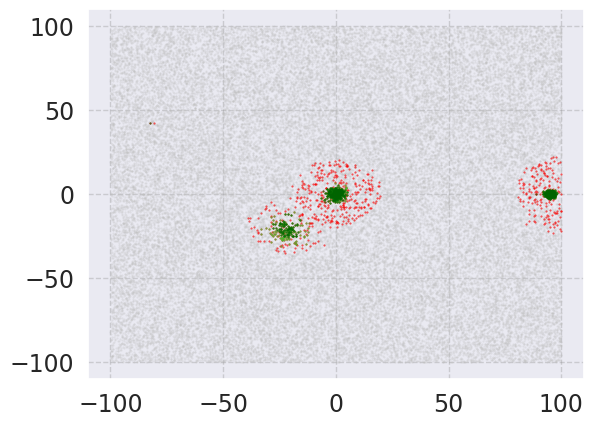

In [31]:
fig = plt.figure(1)
plt.scatter(X[:-cont,0], X[:-cont,1], marker='.', s=1, c='silver', alpha=0.3)
for jj in range(3):
    Putative   = EE_book['X_OVER_clusters'][jj]['Putative']
    Pruned     = EE_book['X_OVER_clusters'][jj]['Pruned']
    Repechaged = EE_book['X_OVER_clusters'][jj]['Repechaged']
    Background = EE_book['X_OVER_clusters'][jj]['Background']
    
    # Plotting the scatterplots

    plt.scatter(X[Putative,0], X[Putative,1], marker='.', s=1, c='red', alpha=0.7)
    plt.scatter(X[Repechaged,0], X[Repechaged,1], marker='.', s=1, c='limegreen', alpha=0.7)
    plt.scatter(X[Pruned,0], X[Pruned,1], marker='.', s=1, c='darkgreen', alpha=0.7)

# Displaying the combined plot
plt.show()


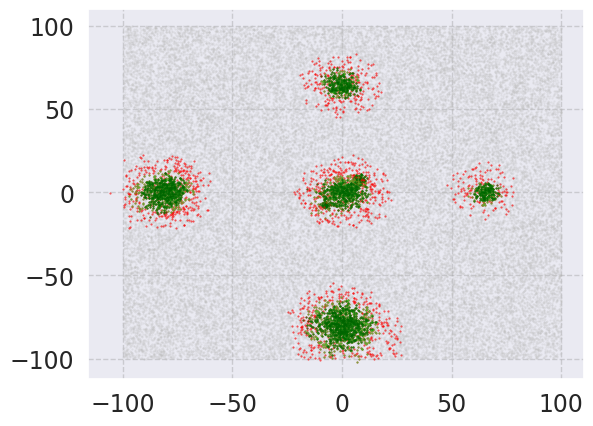

In [29]:
fig = plt.figure(2)
plt.scatter(Y[:-cont,0], Y[:-cont,1], marker='.', s=1, c='silver', alpha=0.3)
for jj in range(7):
    Putative   = EE_book['Y_OVER_clusters'][jj]['Putative']
    Pruned     = EE_book['Y_OVER_clusters'][jj]['Pruned']
    Repechaged = EE_book['Y_OVER_clusters'][jj]['Repechaged']
    Background = EE_book['Y_OVER_clusters'][jj]['Background']
    cont = 3000

    # Plotting the scatterplots
    
    plt.scatter(Y[Putative,0], Y[Putative,1], marker='.', s=1, c='red', alpha=0.7)
    plt.scatter(Y[Repechaged,0], Y[Repechaged,1], marker='.', s=1, c='limegreen', alpha=0.7)
    plt.scatter(Y[Pruned,0], Y[Pruned,1], marker='.', s=1, c='darkgreen', alpha=0.7)

# Displaying the combined plot
plt.show()



#### Structure of the dictionary containing the results
    EE_book = {
    "Y_OVER_clusters": {
        i: {"Putative": None, "Pruned": None, "Repechaged": None, "Background": None}
        for i in range(len(clusters_plus))
    },
    "X_OVER_clusters": {
        i: {"Putative": None, "Pruned": None, "Repechaged": None, "Background": None}
        for i in range(len(clusters_minus))
    }
    }   

## 3 Results visualization

In [ ]:
from EagleEye_v7 import pval_post_equalization
# get the distribution of Upsilon_i^+
over_clusters = IV_IE_dict.get("OVER_clusters", {})
under_clusters = IV_IE_dict.get("UNDER_clusters", {})

# Suppose these are your arrays of Upsilon_i^+ for all test points and for the "OVER" subset
data_all = result_dictionary['stats']['Upsilon_i_plus']
all_overdensities = [
    idx 
    for cluster_data in over_clusters.values() 
    for idx in cluster_data.get('From_test', [])
]

all_underdensities = [
    idx 
    for cluster_data in under_clusters.values() 
    for idx in cluster_data.get('From_ref', [])
]

all_eualized_o = [x for x in range(test_data.shape[0]) if x not in all_overdensities ]
all_eualized_u = [x for x in range(reference_data.shape[0]) if x not in all_underdensities ]

NUMBER_CORES = 10
PARTITION_SIZE = 100

Upsilon_post_IE_o = pval_post_equalization(
    test_data, 
    reference_data, 
    all_eualized_o,
    K_M,
    NUMBER_CORES,
    PARTITION_SIZE
    )

Upsilon_post_IE_u = pval_post_equalization(
    reference_data, 
    test_data, 
    all_eualized_u,
    K_M,
    NUMBER_CORES,
    PARTITION_SIZE
    )

In [ ]:

def plot_third_subplot(ax, 
                       Upsilon_i, 
                       null_distribution, 
                       Upsilon_star_plus, 
                       Upsilon_set_equalized, 
                       Upsilon_set_repechage,
                       Upsilon_set_pruned,
                       n_bins=100,
                       legend = True,
                       var_legend = 'X' ):
    """
    Plots a log-log histogram on the provided Axes object using pre-loaded data.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes object on which to plot.
    Upsilon_i : array-like
        Original dataset (e.g. first 50000 rows from column 0).
    null_distribution : array-like
        Dataset after equalization (e.g. all rows from column 1).
    Upsilon_star_plus : float
        Critical threshold value (e.g. first row, column 2).
    Upsilon_set_equalized : array-like
        Null distribution (e.g. first 47019 rows from column 3).
    Upsilon_set_repechage : array-like
        Points recognized as anomalies (e.g. first 2982 rows from column 4).
    n_bins : int, optional
        Number of logarithmically spaced bins (default is 100).
    """
    # -------------------------------
    # 1. Define fixed logarithmically spaced bins based on the Original dataset
    # -------------------------------
    bins = np.logspace(np.log10(np.min(Upsilon_i)),
                       np.log10(np.max(400)),
                       n_bins)

    # -------------------------------
    # 2. Compute histograms and normalize appropriately
    # -------------------------------
    # For the Original dataset, normalize by its own number of elements.
    counts_Upsilon_i, _ = np.histogram(Upsilon_i, bins=bins)
    norm_Upsilon_i = counts_Upsilon_i / len(Upsilon_i)
    
    # For the dataset after equalization, normalize by its own number of elements.
    counts_null_distribution, _ = np.histogram(null_distribution, bins=bins)
    norm_null_distribution = counts_null_distribution / len(null_distribution)
    
    # For the null distribution, normalize by its own number of elements.
    counts_Upsilon_set_equalized, _ = np.histogram(Upsilon_set_equalized, bins=bins)
    norm_Upsilon_set_equalized = counts_Upsilon_set_equalized / len(Upsilon_set_equalized)
    
    # For the anomalies, normalize by the size of the Original dataset.
    counts_Upsilon_set_repechage, _ = np.histogram(Upsilon_set_repechage, bins=bins)
    norm_Upsilon_set_repechage = counts_Upsilon_set_repechage / len(Upsilon_i)
    
    # For the anomalies, normalize by the size of the Original dataset.
    counts_Upsilon_set_pruned, _ = np.histogram(Upsilon_set_pruned, bins=bins)
    norm_Upsilon_set_pruned = counts_Upsilon_set_pruned / len(Upsilon_i)

    # Compute bin centers and widths (for bar plotting)
    bin_centers = np.sqrt(bins[:-1] * bins[1:])  # Geometric mean for log bins.
    bin_widths  = np.diff(bins)                    # Width of each bin.

    # -------------------------------
    # 3. Plotting
    # -------------------------------
    # Set both axes to logarithmic scale.
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Increase tick thickness.
    ax.tick_params(axis='both', which='major', length=8, width=2)
    ax.tick_params(axis='both', which='minor', length=4, width=1.5)

    # Plot Original dataset and anomalies as bars with white edges.
    #ax.bar(bin_centers, norm_Upsilon_i, width=bin_widths, color='silver',
    #       alpha=0.6, edgecolor='white', linewidth=2,
    #       label=r'Flagged anomalous points: $\mathcal{Y}^+$', align='center')
    vlll = -50
        # First 32 bars with a white edge
    ax.bar(bin_centers[:vlll], norm_Upsilon_i[:vlll], width=bin_widths[:vlll],
           color='silver', alpha=0.6, edgecolor='white', linewidth=2,
            align='center')
    if var_legend =='X':
        # The remaining bars with a red edge
        ax.bar(bin_centers[vlll:], norm_Upsilon_i[vlll:], width=bin_widths[vlll:],
               color='silver', alpha=0.6, edgecolor='red', linewidth=2,
               label=r'Flagged anomalous points: $\mathcal{X}^+$',align='center')
        ax.bar(bin_centers, norm_Upsilon_set_repechage, width=bin_widths, color='limegreen',
               alpha=0.6, edgecolor='white', linewidth=2,
               label=r'Anomalies after $rep\hat{e}chage$: $\mathcal{X}_{\alpha}^{\mathrm{anom}}$', align='center')

        ax.bar(bin_centers, norm_Upsilon_set_pruned, width=bin_widths, color='darkgreen',
               alpha=0.6, edgecolor='white', linewidth=2,
               label=r'Pruned set: $\hat{\mathcal{X}}^+$', align='center')    



        # Plot the equalized dataset and null distribution as lines.
        ax.plot(bin_centers, norm_null_distribution, marker='.', color='black',
                label=r'Null distribution')

        ax.bar(bin_centers, norm_Upsilon_set_equalized, width=bin_widths, color='dodgerblue',
               alpha=0.6, edgecolor='white', linewidth=2,
               label=r'Dataset after equalization: $\mathcal{X}^{\mathrm{eq}}$', align='center')   

        # Add a vertical dashed red line at the critical threshold.
        ax.axvline(x=Upsilon_star_plus, color='red', linestyle='--', linewidth=2,
                   label=r'Critical threshold:$\mathcal{X}_+^{*}$')
    else:
    
    
            # The remaining bars with a red edge
        ax.bar(bin_centers[vlll:], norm_Upsilon_i[vlll:], width=bin_widths[vlll:],
               color='silver', alpha=0.6, edgecolor='red', linewidth=2,
               label=r'Flagged anomalous points: $\mathcal{Y}^+$',align='center')
        ax.bar(bin_centers, norm_Upsilon_set_repechage, width=bin_widths, color='limegreen',
               alpha=0.6, edgecolor='white', linewidth=2,
               label=r'Anomalies after $rep\hat{e}chage$: $\mathcal{Y}_{\alpha}^{\mathrm{anom}}$', align='center')

        ax.bar(bin_centers, norm_Upsilon_set_pruned, width=bin_widths, color='darkgreen',
               alpha=0.6, edgecolor='white', linewidth=2,
               label=r'Pruned set: $\hat{\mathcal{Y}}^+$', align='center')    



        # Plot the equalized dataset and null distribution as lines.
        ax.plot(bin_centers, norm_null_distribution, marker='.', color='black',
                label=r'Null distribution')

        ax.bar(bin_centers, norm_Upsilon_set_equalized, width=bin_widths, color='dodgerblue',
               alpha=0.6, edgecolor='white', linewidth=2,
               label=r'Dataset after equalization: $\mathcal{Y}^{\mathrm{eq}}$', align='center')   

        # Add a vertical dashed red line at the critical threshold.
        ax.axvline(x=Upsilon_star_plus, color='red', linestyle='--', linewidth=2,
                   label=r'Critical threshold:$\mathcal{Y}_+^{*}$')



    # Set the x and y limits.
    ax.set_xlim([1.5, 400])
    ax.set_ylim([1e-5, 1])

    # Labeling and legend.
    ax.set_xlabel(r'$\mathbf{\Upsilon}_i$')
    
    handles, labels = ax.get_legend_handles_labels()

    # Define the desired order of indices.
    # For example, if the plotting order (and default legend order) is:
    #  0: 'Original dataset'
    #  1: 'Points detected as anomalies'
    #  2: 'Points removed by density equalization'
    #  3: 'Null distribution'
    #  4: 'Dataset after equalization'
    #  5: 'Critical Threshold'
    #
    # and you want the legend to list them in the order:
    # 'Critical Threshold', 'Original dataset', 'Null distribution',
    # 'Dataset after equalization', 'Points removed by density equalization',
    # 'Points detected as anomalies', then your order list would be:
    desired_order = [0, 1, 2, 4, 3, 5 ]

    # Reorder the handles and labels according to the desired order.
    ordered_handles = [handles[i] for i in desired_order]
    ordered_labels = [labels[i] for i in desired_order]

    # Now create the legend with the new ordering.
    if legend:
        ax.legend(ordered_handles, ordered_labels)
    #ax.legend()

In [ ]:
def plot_first_subplot(ax, 
                       result_dictionary, 
                       test_data,
                       reference_data,
                       truncated_cmap_reds, 
                       truncated_cmap_purples,
                       qt
                      ):
    
    
    # Plotting test data using truncated Reds
    idx_plot = result_dictionary['stats']['Upsilon_i_plus'] >= result_dictionary['Upsilon_star_plus'][qt]
    sc1 = axes[1].scatter(
        test_data[idx_plot, 0],
        test_data[idx_plot, 1],
        test_data[idx_plot, 2],
        c=result_dictionary['stats']['Upsilon_i_plus'][idx_plot],
        cmap=truncated_cmap_reds,  # Use truncated Reds colormap
        label=r'Flagged anomalous points: $\mathcal{Y}^+$',
        alpha=1,
        s=5,
        vmin=result_dictionary['Upsilon_star_plus'][qt]
    )

    # Colorbar for the first scatter
    colorbar1 = fig.colorbar(sc1, ax=axes[1], orientation='vertical', fraction=0.05, pad=0.03)
    colorbar1.set_label(r'$\mathbf{\Upsilon}_i(\mathcal{Y}^+)$')

    # Plotting reference data using truncated Purples
    idx_plot2 = result_dictionary['stats_reverse']['Upsilon_i_plus'] >= result_dictionary['Upsilon_star_plus'][qt]
    sc2 = axes[1].scatter(
        reference_data[idx_plot2, 0],
        reference_data[idx_plot2, 1],
        reference_data[idx_plot2, 2],
        c=result_dictionary['stats_reverse']['Upsilon_i_plus'][idx_plot2],
        label=r'Flagged anomalous points: $\mathcal{X}^+$',
        cmap=truncated_cmap_purples,  # Use truncated Purples colormap
        alpha=1,
        s=5,
        vmin=result_dictionary['Upsilon_star_plus'][qt]
    )
    colorbar2 = fig.colorbar(sc2, ax=axes[1], orientation='horizontal', fraction=0.05, pad=0.03)
    colorbar2.set_label(r'$\mathbf{\Upsilon}_i(\mathcal{X}^+)$')

    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_zlim(-100, 100)
    #axes[0].set_title("$\\Upsilon_i^+ \geq \\Upsilon_*^+$ in Test and Reference ", fontsize=14)
    ax.legend(markerfirst=True, markerscale=3)

In [ ]:
qt

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = True  # Use LaTeX for all text

import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from utils_37 import get_shades
import plot_utilities

# --- Define a function to truncate a colormap ---
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """
    Return a new colormap which is a subset of the given colormap.
    
    Parameters:
        cmap : matplotlib.colors.Colormap
            The original colormap.
        minval : float
            The lower bound of the new colormap (0 to 1).
        maxval : float
            The upper bound of the new colormap (0 to 1).
        n : int
            The number of discrete colors.
    
    Returns:
        new_cmap : matplotlib.colors.LinearSegmentedColormap
            The truncated colormap.
    """
    new_colors = cmap(np.linspace(minval, maxval, n))
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f"truncated({cmap.name}, {minval:.2f}, {maxval:.2f})", new_colors)
    return new_cmap

# --- Create truncated versions of 'Reds' and 'Purples' (skipping the first 20%) ---
truncated_cmap_reds = truncate_colormap(plt.get_cmap('Oranges'), minval=0.3, maxval=1.0, n=100)
truncated_cmap_purples = truncate_colormap(plt.get_cmap('BuPu'), minval=0.5, maxval=1.0, n=100)

# -------------------------------------------------------------------------
# Your existing code:
over_clusters = IV_IE_dict.get("OVER_clusters", {})
under_clusters = IV_IE_dict.get("UNDER_clusters", {})




overdensities_IE_AG = [
    idx 
    for cluster_data in over_clusters.values() 
    for idx in cluster_data.get('From_test', [])
]

overdensities_IE = [
    idx 
    for cluster_data in over_clusters.values() 
    for idx in cluster_data.get('IE_extra', [])
]

underdensities_IE_AG = [
    idx 
    for cluster_data in under_clusters.values() 
    for idx in cluster_data.get('From_ref', [])
]

underdensities_IE = [
    idx 
    for cluster_data in under_clusters.values() 
    for idx in cluster_data.get('IE_extra', [])
]


# Suppose these are your arrays of Upsilon_i^+ for all test points and for the "OVER" subset
data_all_o       = result_dictionary['stats']['Upsilon_i_plus']

data_sub_o_IE_AG = data_all_o[overdensities_IE_AG]
data_sub_o_IE    = data_all_o[overdensities_IE]


data_all_u       = result_dictionary['stats_reverse']['Upsilon_i_plus']

data_sub_u_IE_AG = data_all_u[underdensities_IE_AG]
data_sub_u_IE    = data_all_u[underdensities_IE]


# -------------------------------------------------------------------------
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



















fig = plt.figure(figsize=(18, 26))
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1,.9])

# 3D subplots (ax0, ax1) ...
ax0a = fig.add_subplot(gs[0, 0], projection='3d')
ax0 = fig.add_subplot(gs[0, 1], projection='3d')
ax1 = fig.add_subplot(gs[1, 0], projection='3d')
ax1b = fig.add_subplot(gs[1, 1], projection='3d')
# 1D distribution subplot
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])

# -------------------------------------------------------------------------
# Continue with your plotting code:
axes = [ax0a, ax0, ax1, ax1b, ax2,ax3]

#############################################################################
# Everything below remains as you had it (titles, colorbars, etc.)          #
#############################################################################
what_ref = reference_data[:-np.array(anomaly_sizes_u).sum(),:]
what_over = test_data[-np.array(anomaly_sizes_o).sum():,:]
what_under = reference_data[-np.array(anomaly_sizes_u).sum():,:]

ax0a.scatter(what_ref[:,0],what_ref[:,1],what_ref[:,2], c='lightgray', s=5, alpha=0.2, label = r'Background')
ax0a.scatter(what_over[:,0],what_over[:,1],what_over[:,2], c='darkorange', s=15, alpha=1,label = r'Contamination of $\mathcal{Y}$ ')
ax0a.scatter(what_under[:,0],what_under[:,1],what_under[:,2], c='darkmagenta', s=15, alpha=1,label = r'Contamination of $\mathcal{X}$ ')


axes[0].legend( markerscale=2)

plot_first_subplot(ax0, 
                       result_dictionary, 
                       test_data,
                       reference_data,
                       truncated_cmap_reds, 
                       truncated_cmap_purples,
                       qt
                  )
#%%
silver_over = result_dictionary['stats']['Upsilon_i_plus']>=result_dictionary['Upsilon_star_plus'][qt]

silver_over = [x for x in silver_over if x not in overdensities_IE_AG]
overdensities_IE_AG = [x for x in overdensities_IE_AG if x not in overdensities_IE]

ax1.scatter(test_data[silver_over,0], test_data[silver_over,1], test_data[silver_over,2], edgecolor='dimgray', facecolor='dimgray', label = r'Flagged anomalous points: $Y^+$ ',marker='.', s=5, alpha=.4)
ax1.scatter(test_data[overdensities_IE_AG,0], test_data[overdensities_IE_AG,1], test_data[overdensities_IE_AG,2], c='limegreen',label=r'Pruned set: $\hat{Y}^+$', marker='*', s=7, alpha=.6)
ax1.scatter(test_data[overdensities_IE,0], test_data[overdensities_IE,1], test_data[overdensities_IE,2], c='darkgreen',label=r'Anomalies after $rep\hat{e}chage$: $Y_{\alpha}^{\textrm{anom}}$', marker='*', s=11, alpha=1)


axes[2].set_xlim(-100, 100)
axes[2].set_ylim(-100, 100)
axes[2].set_zlim(-100, 100)


#%%
silver_under = result_dictionary['stats_reverse']['Upsilon_i_plus']>=result_dictionary['Upsilon_star_plus'][qt]

silver_under = [x for x in silver_under if x not in underdensities_IE_AG]
underdensities_IE_AG = [x for x in underdensities_IE_AG if x not in underdensities_IE]

ax1b.scatter(reference_data[silver_under,0], reference_data[silver_under,1], reference_data[silver_under,2], edgecolor='dimgray', facecolor='dimgray', label = r'Flagged anomalous points: $X^+$ ', marker='.', s=5, alpha=.4)
ax1b.scatter(reference_data[underdensities_IE_AG,0], reference_data[underdensities_IE_AG,1], reference_data[underdensities_IE_AG,2], c='limegreen',label=r'Pruned set: $\hat{X}^+$', marker='*', s=7, alpha=.6)
ax1b.scatter(reference_data[underdensities_IE,0], reference_data[underdensities_IE,1], reference_data[underdensities_IE,2], c='darkgreen', label=r'Anomalies after $rep\hat{e}chage$: $X_{\alpha}^{\textrm{anom}}$', marker='*', s=11, alpha=1)


axes[3].set_xlim(-100, 100)
axes[3].set_ylim(-100, 100)
axes[3].set_zlim(-100, 100)
handles, _ = axes[2].get_legend_handles_labels()
handles2, _ = axes[3].get_legend_handles_labels()



#axes[1].legend(['$\\Upsilon_i^+ \geq \\Upsilon_*^+$','Points detected as anomalies','Points removed by density equalization'])
# Get the current legend handles and labels (if any)


# Rearrange the handles so that the last two are swapped.
# This keeps the first handle in place and inverts the order of the second and third.
new_handles = [handles[0], handles[2], handles[1]]
new_handles2 = [handles2[0], handles2[2], handles2[1]]

# Specify the new legend labels accordingly.
new_labels = [
    r'Flagged anomalous points: $\mathcal{Y}^+$ ',
    r'Pruned set: $\hat{\mathcal{Y}}^+$',
    r'Anomalies after $rep\hat{e}chage$: $\mathcal{Y}_{\alpha}^{\mathrm{anom}}$'
]

new_labels2 = [
    r'Flagged anomalous points: $\mathcal{X}^+$ ',
    r'Pruned set: $\hat{\mathcal{X}}^+$',
    r'Anomalies after $rep\hat{e}chage$: $\mathcal{X}_{\alpha}^{\mathrm{anom}}$'
]

# Apply the new legend with reordered handles and labels.
axes[2].legend(new_handles, new_labels, markerscale=5)
axes[3].legend(new_handles2, new_labels2, markerscale=5)
# -------------------------------------------------------------------------
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

plot_third_subplot(ax2, 
                   data_all_o, 
                   result_dictionary['Upsilon_i_plus_null'], 
                   result_dictionary['Upsilon_star_plus'][qt], 
                   Upsilon_post_IE_o, 
                   data_sub_o_IE_AG, 
                   data_sub_o_IE,
                   n_bins=300,
                   legend = True,
                   var_legend = 'Y')


plot_third_subplot(ax3, 
                   data_all_u, 
                   result_dictionary['Upsilon_i_plus_null'], 
                   result_dictionary['Upsilon_star_plus'][qt], 
                   Upsilon_post_IE_u, 
                   data_sub_u_IE_AG, 
                   data_sub_u_IE,
                   n_bins=300,
                   legend = True,
                   var_legend = 'X')

plt.tight_layout()
# -------------------------------------------------------------------------
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# Adding labels to each subplot
ax0a.annotate('A', xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=21, fontweight='bold', va='top', ha='left')


# Adding labels to each subplot
ax0.annotate('B', xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=21, fontweight='bold', va='top', ha='left')

#ax0.set_title('Candidate anomalous points ')

ax1.annotate('C', xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=21, fontweight='bold', va='top', ha='left')

ax1b.annotate('D', xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=21, fontweight='bold', va='top', ha='left')

ax1.set_title('$\mathcal{X}$ reference, $\mathcal{Y}$ test ($\mathcal{Y}-\mathrm{Overdensities}$)')
ax1b.set_title('$\mathcal{Y}$ reference, $\mathcal{X}$ test ( $\mathcal{X}-\mathrm{Overdensities}$)')

ax2.annotate('E', xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=21, fontweight='bold', va='top', ha='left')

#ax2.set_title('Reference $\mathcal{X}$, test $\mathcal{Y}$ ($\mathcal{Y}-Overdensities$)')


ax3.annotate('F', xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=21, fontweight='bold', va='top', ha='left')

#ax3.set_title('Reference $\mathcal{Y}$, test $\mathcal{X}$ ( $\mathcal{X}-Overdensities$)')
plt.savefig('scatterplot_KM500_q1-5e-6.pdf', format='pdf')
plt.show()


In [ ]:
result_dictionary['Upsilon_star_plus'][qt]

In [ ]:
anomaly_sizes_o = [50, 100, 200, 300, 500, 700, 900]
total_array_size = 50000

# Compute the total number of anomalous points
total_anomaly_points = sum(anomaly_sizes_o)

# The anomalies start at this index in the array
start_index = total_array_size - total_anomaly_points

# Retrieve the indexes for each anomaly group
anomaly_indices_o = []  # This will be a list of lists containing the indices for each anomaly

current_index = start_index
for size in anomaly_sizes_o:
    # The anomaly covers indices from current_index to current_index + size - 1
    indices = list(range(current_index, current_index + size))
    anomaly_indices_o.append(indices)
    # Update the current_index for the next anomaly
    current_index += size

anomaly_sizes_u = [ 100, 300, 700, ]
total_array_size = 50000

# Compute the total number of anomalous points
total_anomaly_points = sum(anomaly_sizes_u)

# The anomalies start at this index in the array
start_index = total_array_size - total_anomaly_points

# Retrieve the indexes for each anomaly group
anomaly_indices_u = []  # This will be a list of lists containing the indices for each anomaly

current_index = start_index
for size in anomaly_sizes_u:
    # The anomaly covers indices from current_index to current_index + size - 1
    indices = list(range(current_index, current_index + size))
    anomaly_indices_u.append(indices)
    # Update the current_index for the next anomaly
    current_index += size
    
    
anomaly_indices_u_back = [[elem + total_array_size for elem in sublist] for sublist in anomaly_indices_u]

In [ ]:
anomaly_columns = [r'$\mathcal{Y_{\alpha=0}}$',r'$\mathcal{Y_{\alpha=1}}$',r'$\mathcal{Y_{\alpha=2}}$',r'$\mathcal{Y_{\alpha=3}}$',r'$\mathcal{Y_{\alpha=4}}$',r'$\mathcal{Y_{\alpha=5}}$',r'$\mathcal{Y_{\alpha=6}}$',r'$\mathcal{X_{\alpha=0}}$',r'$\mathcal{X_{\alpha=1}}$',r'$\mathcal{X_{\alpha=2}}$']

anomaly_columns

In [ ]:
order = []

for jj in list(IV_IE_dict['OVER_clusters'].keys()):

    order.append(
np.array(IV_IE_dict['OVER_clusters'][jj]['IE_extra'])[np.array(IV_IE_dict['OVER_clusters'][jj]['IE_extra'])>=47000].mean())



sorted_indices = sorted(range(len(order)), key=lambda i: order[i])

sorted_indices





In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML, Javascript

# -----------------------------
# Define Statistic Names (Row Labels)
# -----------------------------
stat_names = [
    "Added set:                 ",                      # stat_names[0]
    "Flagged: "+r"$\mathcal{Y}^+$ or $\mathcal{X}^+$",             # stat_names[1]
    "Pruned: "+ r"$\hat{\mathcal{Y}}^+$ or $\hat{\mathcal{X}}^+$ ",  # stat_names[2]
    "Repechage: " + r"$\mathcal{Y}_{\alpha}^{anom}$ or $\mathcal{X}_{\alpha}^{anom}$",  # stat_names[3]
    "Injected: " + r"$\mathcal{Y}_{\alpha}^{inj}$ or $\mathcal{X}_{\alpha}^{inj}$"   # stat_names[4]
]

# Initialize the DataFrames with NaN values
df = pd.DataFrame(np.nan, index=stat_names, columns=anomaly_columns)
df1 = pd.DataFrame(np.nan, index=stat_names, columns=anomaly_columns)

# -----------------------------
# Populate the DataFrames
# -----------------------------
# Combine anomaly sizes for all clusters.
anomaly_sizes_all = anomaly_sizes_o + anomaly_sizes_u

counter = 0
for anomaly in anomaly_columns:
    # Row 0: Injected anomaly size
    df.at[stat_names[0], anomaly] = anomaly_sizes_all[counter]
    df1.at[stat_names[0], anomaly] = anomaly_sizes_all[counter]
    
    if counter < 7:
        # For Overdensities (first 7 columns)
        # stat_names[1]: count of clusters below 50000
        df.at[stat_names[1], anomaly] = len(clusters_plus[sorted_indices[counter]][clusters_plus[sorted_indices[counter]] < 50000])
        # stat_names[2]: count from 'IE_extra'
        df.at[stat_names[2], anomaly] = len(IV_IE_dict['OVER_clusters'][sorted_indices[counter]]['IE_extra'])
        # stat_names[3]: count from 'From_test'
        df.at[stat_names[3], anomaly] = len(IV_IE_dict['OVER_clusters'][sorted_indices[counter]]['From_test'])
        # stat_names[4]: count from 'From_ref'
        df.at[stat_names[4], anomaly] = len(IV_IE_dict['OVER_clusters'][sorted_indices[counter]]['From_ref'])
        
        df1.at[stat_names[1], anomaly] = len([x for x in clusters_plus[sorted_indices[counter]][clusters_plus[sorted_indices[counter]] < 50000]
                                                if x in anomaly_indices_o[counter]])
        df1.at[stat_names[2], anomaly] = len([x for x in IV_IE_dict['OVER_clusters'][sorted_indices[counter]]['IE_extra']
                                                if x in anomaly_indices_o[counter]])
        df1.at[stat_names[3], anomaly] = len([x for x in IV_IE_dict['OVER_clusters'][sorted_indices[counter]]['From_test']
                                                if x in anomaly_indices_o[counter]])
        df1.at[stat_names[4], anomaly] = 0
    else:
        # For Underdensities (last 3 columns; adjust index by subtracting 7)
        idx = counter - 7
        # stat_names[1]: count of clusters with values >= 50000
        df.at[stat_names[1], anomaly] = len(clusters_minus[idx][clusters_minus[idx] >= 50000])
        # stat_names[2]: count from 'IE_extra'
        df.at[stat_names[2], anomaly] = len(IV_IE_dict['UNDER_clusters'][idx]['IE_extra'])
        # stat_names[3]: count from 'From_ref'
        df.at[stat_names[3], anomaly] = len(IV_IE_dict['UNDER_clusters'][idx]['From_ref'])
        # stat_names[4]: count from 'From_test'
        df.at[stat_names[4], anomaly] = len(IV_IE_dict['UNDER_clusters'][idx]['From_test'])
        
        df1.at[stat_names[1], anomaly] = len([x for x in clusters_minus[idx][clusters_minus[idx] >= 50000]
                                               if x in anomaly_indices_u_back[idx]])
        df1.at[stat_names[2], anomaly] = len([x for x in IV_IE_dict['UNDER_clusters'][idx]['IE_extra']
                                               if x in anomaly_indices_u[idx]])
        df1.at[stat_names[3], anomaly] = len([x for x in IV_IE_dict['UNDER_clusters'][idx]['From_ref']
                                               if x in anomaly_indices_u[idx]])
        df1.at[stat_names[4], anomaly] = 0
        
    counter += 1

# -----------------------------
# Combine the DataFrames into One
# -----------------------------
# Create a new DataFrame where each cell shows the value from df
# with the corresponding value from df1 in parentheses.
combined_df = pd.DataFrame(index=stat_names, columns=anomaly_columns)

for row in stat_names:
    for col in anomaly_columns:
        val_df = df.at[row, col]
        val_df1 = df1.at[row, col]
        if pd.notnull(val_df) and pd.notnull(val_df1):
            combined_df.at[row, col] = f"{int(val_df)} ({int(val_df1)})"
        elif pd.notnull(val_df):
            combined_df.at[row, col] = f"{int(val_df)}"
        elif pd.notnull(val_df1):
            combined_df.at[row, col] = f"({int(val_df1)})"
        else:
            combined_df.at[row, col] = ""

# -----------------------------
# Display the Combined Table
# -----------------------------
html_table = combined_df.to_html(escape=False)
display(HTML(html_table))

# (Optional) Force MathJax to re-typeset the page so that LaTeX in the table is rendered properly.
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


In [ ]:

def MAS_estimate(dict,IVIE,mixed_samples, reference_samples,thresh=14):
    over_clusters  = IVIE["OVER_clusters"] # Need to generate as a function of Upsilon_star
    lenSo          =  len(np.concatenate([over_clusters[idx]['From_test'] for idx in list(over_clusters.keys())]))
    lenBo          =  len(np.concatenate([over_clusters[idx]['From_ref'] for idx in list(over_clusters.keys())]))
    lenWo          =  len(np.concatenate([over_clusters[idx]['IE_extra'] for idx in list(over_clusters.keys())]))
    S_B           = lenWo / np.sqrt(lenSo - lenWo)
    n2            = len(mixed_samples) 
    n1            = len(reference_samples)
    SoUpsilons    =  np.concatenate([dict['stats']['Upsilon_i_plus'][over_clusters[idx]['From_test']] for idx in list(over_clusters.keys())])
    print("Upsilon_xi = ", min(SoUpsilons))
    # ----------------------------
    # Eqn rom draft
    S_B = lenSo  - (lenBo/n1) *  (n2 - lenWo)
    S_B = S_B / np.sqrt(S_B)
    return [S_B,min(SoUpsilons)]

def MAS(dict,lables_mix,thresh=14):
    l   = lables_mix#dict['stats']['lables_mix']
    s   = dict['stats']['Upsilon_i_plus'][(dict['stats']['Upsilon_i_plus']>thresh) & (l==1)]
    b   = dict['stats']['Upsilon_i_plus'][(dict['stats']['Upsilon_i_plus']>thresh) & (l==0)]
    return len(s)/np.sqrt(len(b))

def S_SB_estimate(dict,IVIE,thresh=14):
    over_clusters  = IVIE["OVER_clusters"] # Need to generate as a function of Upsilon_star
    lenSo          =  len(np.concatenate([over_clusters[idx]['From_test'] for idx in list(over_clusters.keys())]))
    lenBo          =  len(np.concatenate([over_clusters[idx]['From_ref'] for idx in list(over_clusters.keys())]))
    lenWo          =  len(np.concatenate([over_clusters[idx]['IE_extra'] for idx in list(over_clusters.keys())]))
    n2            = len(dict['stats']['mixed_samples']) 
    n1            = len(dict['stats']['reference_samples'])
    S_SB = lenSo  - (lenBo/n1) *  (n2 - lenWo)
    S_SB = S_SB / lenSo
    return S_SB

def S_SB(dict,thresh=14):
    l   = dict['stats']['lables_mix']
    s = dict['stats']['Upsilon_i_plus'][(dict['stats']['Upsilon_i_plus']>thresh) & (l==1)]
    b = dict['stats']['Upsilon_i_plus'][(dict['stats']['Upsilon_i_plus']>thresh) & (l==0)]
    return len(s)/(len(s) + len(b))

In [ ]:
MAS_estimate(result_dictionary,IV_IE_dict,reference_data, test_data,result_dictionary['Upsilon_star_plus'][qt])

In [ ]:

# Define anomaly sizes
anomaly_sizes_o = [50, 100, 200, 300, 500, 700, 900]
total_array_size = 50000

# Compute the number of zeros and ones
num_zeros = total_array_size - np.sum(anomaly_sizes_o)
num_ones = np.sum(anomaly_sizes_o)

# Create a single list (or array) with first all zeros, then all ones
lables_mix = np.concatenate([np.zeros(num_zeros), np.ones(num_ones)])

MAS(result_dictionary,lables_mix,result_dictionary['Upsilon_star_plus'][qt])

In [ ]:
Ups_i_p_navy               = data_all
null_green                 = result_dictionary['Upsilon_i_plus_null']
Ups_s_p_red                = result_dictionary['Upsilon_star_plus'][0]
Ups_i_p_post_IE_magenta    = Upsilon_post_IE
Ups_i_p_post_IE_AG_gold    = data_sub

In [ ]:
import pandas as pd

# Suppose you have the following data:
Ups_i_p_navy = data_all
null_green = result_dictionary['Upsilon_i_plus_null']
Ups_s_p_red = result_dictionary['Upsilon_star_plus'][1]
Ups_i_p_post_IE_magenta = Upsilon_post_IE
Ups_i_p_post_IE_AG_gold = data_sub

# Create a DataFrame from the vectors. 
# pd.Series(...) ensures each list/array is converted to a column with flexible length.
df = pd.DataFrame({
    'Ups_i_p_navy': pd.Series(Ups_i_p_navy),
    'null_green': pd.Series(null_green),
    'Ups_s_p_red': pd.Series(Ups_s_p_red),
    'Ups_i_p_post_IE_magenta': pd.Series(Ups_i_p_post_IE_magenta),
    'Ups_i_p_post_IE_AG_gold': pd.Series(Ups_i_p_post_IE_AG_gold)
})

# Save to CSV
df.to_csv('pannelC.csv', index=False)
print("Data saved to my_vectors.csv")

In [ ]:
Ups_s_p_red